In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startups=pd.read_csv("\\Users\\piyus\\Downloads\\50_Startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.shape

(50, 5)

In [5]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
startup=startups.drop(['State'],axis=1)

In [9]:
startup_=startup.rename({'R&D Spend':'RD','Marketing Spend':'Marketing_Spend' },axis=1)

In [10]:
startup_.corr()

,RD,Administration,Marketing_Spend,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


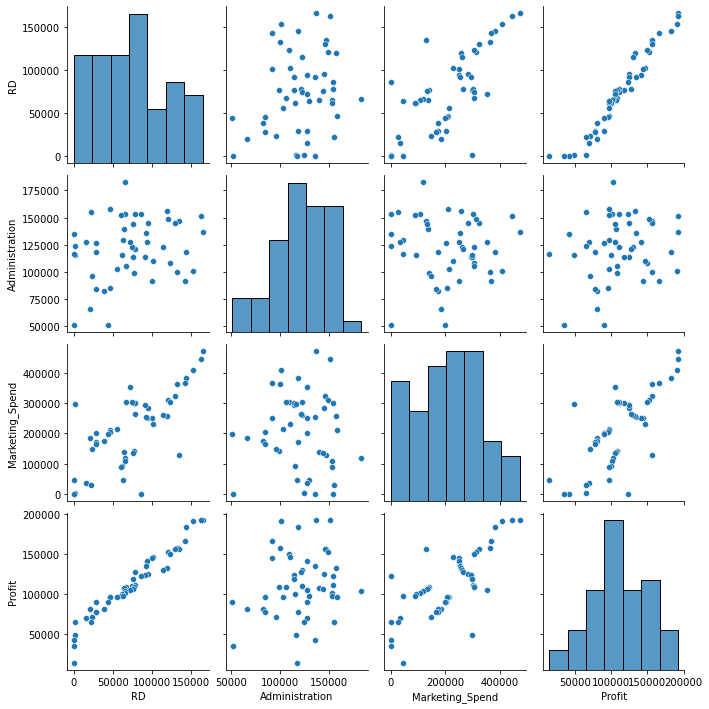

In [11]:
sns.pairplot(startup_)

In [12]:
model=smf.ols("Profit~Administration+Marketing_Spend+RD",data=startup_).fit()

In [13]:
model.params

Intercept          50122.192990
Administration        -0.026816
Marketing_Spend        0.027228
RD                     0.805715
dtype: float64

In [14]:
model.aic

1058.7714985998055

In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
(model.tvalues,'n/',model.pvalues)

(Intercept           7.626218
 Administration     -0.525507
 Marketing_Spend     1.655077
 RD                 17.846374
 dtype: float64,
 'n/',
 Intercept          1.057379e-09
 Administration     6.017551e-01
 Marketing_Spend    1.047168e-01
 RD                 2.634968e-22
 dtype: float64)

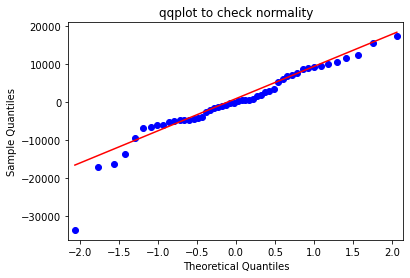

In [17]:
import statsmodels.api as sm
qqplt=sm.qqplot(model.resid,line='q')
plt.title('qqplot to check normality')
plt.show()

In [18]:
def get_standardized_values( vals ):
     return (vals - vals.mean())/vals.std()

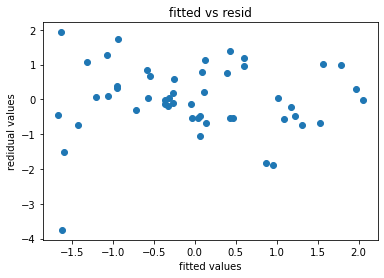

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('fitted vs resid')
plt.xlabel('fitted values')
plt.ylabel('redidual values')
plt.show()

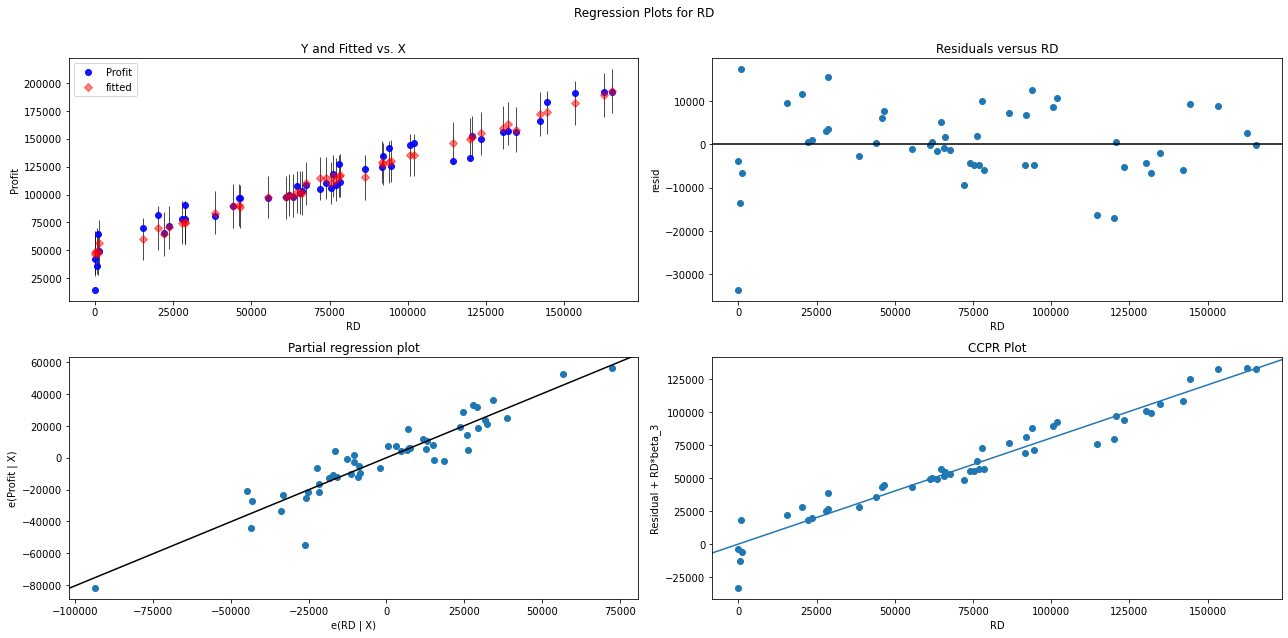

In [20]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)

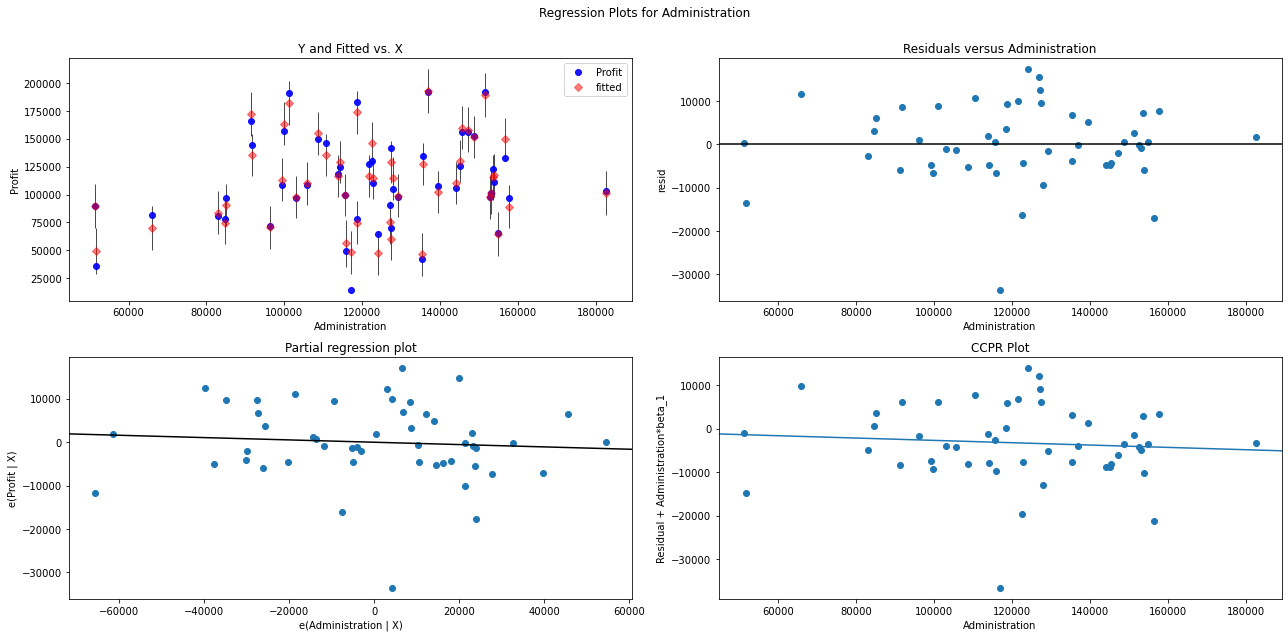

In [21]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)

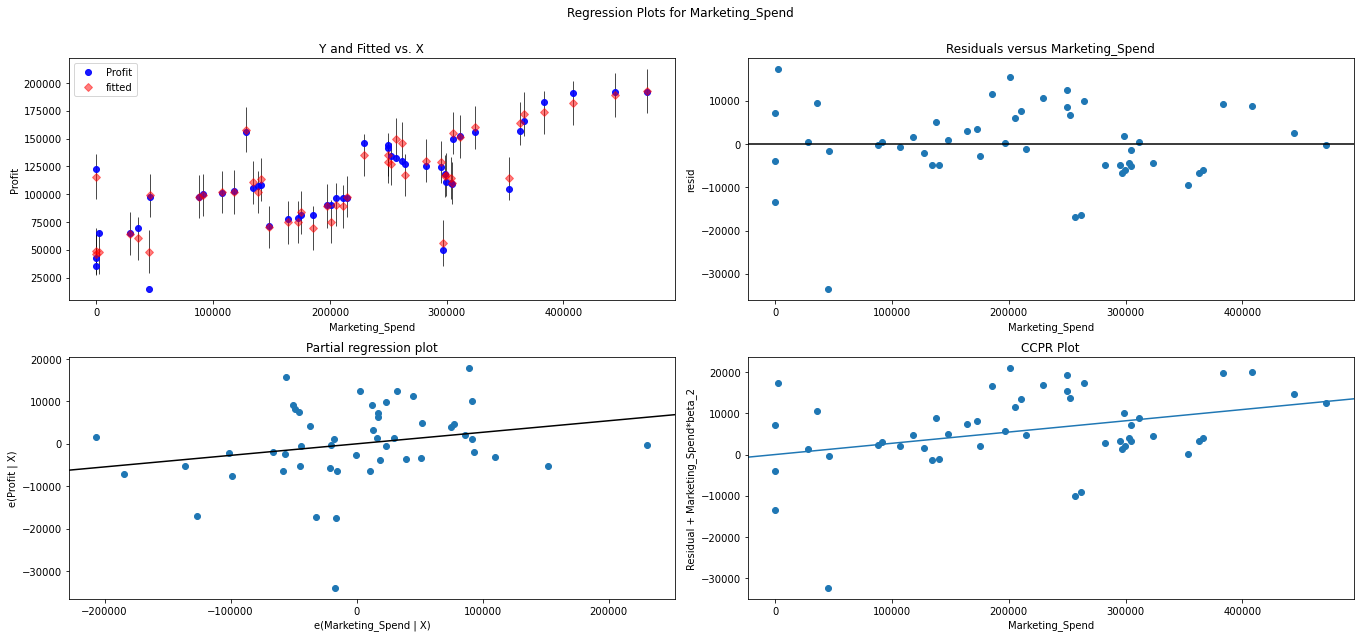

In [22]:
fig=plt.figure(figsize=(19,9))
fig=sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)

In [23]:
influence=model.get_influence()
(c_r,_)=influence.cooks_distance

Text(0, 0.5, 'cooks distance')

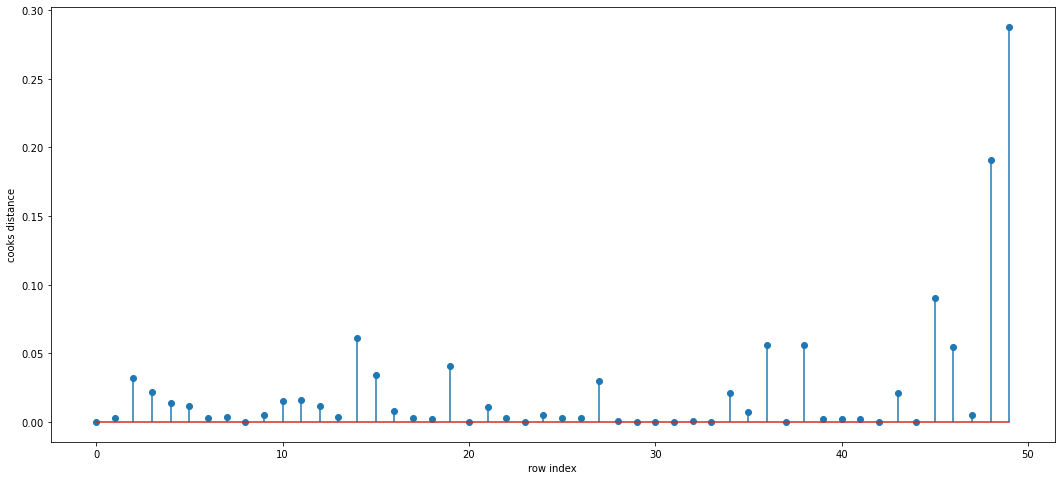

In [24]:
fig=plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(startup_)),np.round(c_r,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')


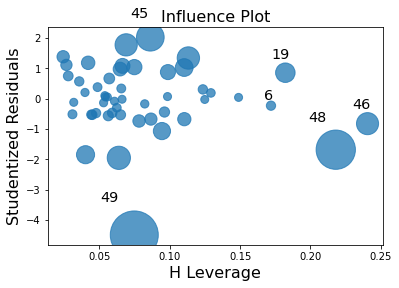

In [25]:
influence_plot(model)
plt.show()

In [26]:
startup_[startup_.index.isin([49,48])]

,RD,Administration,Marketing_Spend,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [27]:
startup__=startup_.drop(startup_.index[[49,48]],axis=0).reset_index()

In [28]:
startup__=startup__.drop(['index'],axis=1)

In [29]:
model_=smf.ols("Profit~Administration+Marketing_Spend+RD",data=startup__).fit()

In [30]:
model_.params

Intercept          59098.493334
Administration        -0.063349
Marketing_Spend        0.016895
RD                     0.789495
dtype: float64

In [31]:
(model_.rsquared,model_.rsquared_adj)

(0.9626766170294073, 0.960131840917776)

In [32]:
model_.aic

994.6690439260116

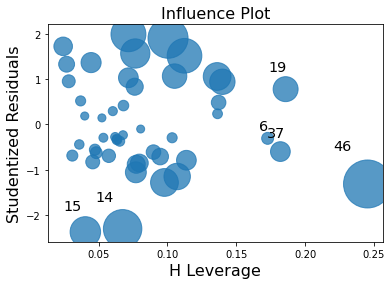

In [36]:
influence_plot(model_)
plt.show()

In [37]:
startup_1=startup__.drop(startup__.index[[46,14]],axis=0).reset_index()

In [38]:
startup_1=startup_1.drop(['index'],axis=1)

In [39]:
model_5=smf.ols("Profit~Administration+Marketing_Spend+RD",data=startup_1).fit()

In [40]:
model_5.params

Intercept          56393.857305
Administration        -0.039235
Marketing_Spend        0.024377
RD                     0.772160
dtype: float64

In [41]:
(model_5.rsquared,model_5.rsquared_adj)

(0.9655640253783063, 0.9631043129053282)

In [42]:
model_5.aic

948.2727741852148

In [43]:
model.pvalues

Intercept          1.057379e-09
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
RD                 2.634968e-22
dtype: float64

In [44]:
model_5.predict(startup_1.iloc[0:,:])

0     190199.503527
1     186827.021949
2     180851.129575
3     172557.720798
4     171463.885498
5     163153.253918
6     157676.614901
7     159190.218656
8     151233.260813
9     154798.709304
10    136334.224594
11    136615.402825
12    129966.676250
13    128269.829524
14    146394.930743
15    118305.602037
16    130680.592859
17    129948.521633
18    117100.615368
19    118087.056493
20    118196.527068
21    116106.187089
22    111820.035471
23    115415.698270
24    104213.151375
25    112172.411145
26    115665.317816
27    103110.245616
28    103659.328547
29    101947.875727
30     99760.201615
31    101409.170313
32    100432.801098
33     91193.746356
34     93597.147522
35     78444.714824
36     93213.836521
37     73943.100706
38     87177.383969
39     78157.915154
40     78617.356118
41     74482.284541
42     64235.148733
43     68135.536656
44     52341.468482
45     51080.388003
dtype: float64